In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Epsilon Greedy Q-Learning with Gym Rendering
env = gym.make("CartPole-v1", render_mode="human")

# Q-table dimensions (discretization)
n_states = 40
episodes = 500
max_steps = 200

# Learning parameters
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 1.0    # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01

In [3]:


# Discretization function
def discretize_state(state):
    bins = np.linspace(-4.8, 4.8, n_states)
    cart_pos = np.digitize(state[0], bins)

    bins = np.linspace(-4, 4, n_states)
    cart_vel = np.digitize(state[1], bins)

    bins = np.linspace(-0.418, 0.418, n_states)
    pole_ang = np.digitize(state[2], bins)

    bins = np.linspace(-4, 4, n_states)
    pole_vel = np.digitize(state[3], bins)

    return (cart_pos, cart_vel, pole_ang, pole_vel)

In [ ]:
# Initialize Q-table
Q = np.zeros((n_states+1, n_states+1, n_states+1, n_states+1, env.action_space.n))
rewards = []
for ep in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    total_reward = 0
    for step in range(max_steps):
        # Epsilon-greedy action
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        # Take action
        next_state, reward, done, _, _ = env.step(action)
        next_state = discretize_state(next_state)
        # Q-learning update
        Q[state + (action,)] = Q[state + (action,)] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state + (action,)]
        )
        state = next_state
        total_reward += reward
        if done:
            break
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    rewards.append(total_reward)
    print(f"Episode {ep+1}/{episodes} - Reward: {total_reward}")
env.close()



Episode 1/500 - Reward: 22.0
Episode 2/500 - Reward: 19.0
Episode 3/500 - Reward: 29.0
Episode 4/500 - Reward: 18.0
Episode 5/500 - Reward: 11.0
Episode 6/500 - Reward: 18.0
Episode 7/500 - Reward: 35.0
Episode 8/500 - Reward: 13.0
Episode 9/500 - Reward: 18.0
Episode 10/500 - Reward: 40.0
Episode 11/500 - Reward: 12.0
Episode 12/500 - Reward: 13.0
Episode 13/500 - Reward: 22.0
Episode 14/500 - Reward: 42.0
Episode 15/500 - Reward: 18.0
Episode 16/500 - Reward: 10.0
Episode 17/500 - Reward: 12.0
Episode 18/500 - Reward: 12.0
Episode 19/500 - Reward: 19.0
Episode 20/500 - Reward: 22.0
Episode 21/500 - Reward: 11.0
Episode 22/500 - Reward: 21.0
Episode 23/500 - Reward: 20.0
Episode 24/500 - Reward: 20.0
Episode 25/500 - Reward: 34.0
Episode 26/500 - Reward: 20.0
Episode 27/500 - Reward: 10.0
Episode 28/500 - Reward: 37.0
Episode 29/500 - Reward: 81.0
Episode 30/500 - Reward: 27.0
Episode 31/500 - Reward: 11.0
Episode 32/500 - Reward: 23.0
Episode 33/500 - Reward: 18.0
Episode 34/500 - Re

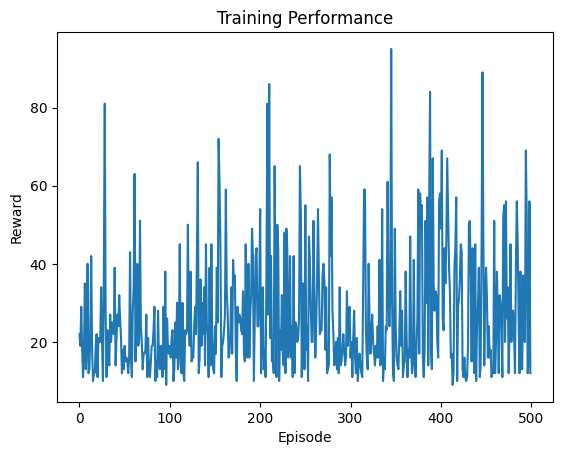

In [6]:
# Plot rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Performance")
plt.show()